In [7]:
import pandas as pd
import random as rnd
import seaborn as sb
import threading

### Задание
Написать программу для построения выравнивания алгоритмом Смита-Ватермана. 
Штрафы за вставки-делеции – линейные (не аффинные). Параметры – премия за 
совпадение m=1, штраф за замену mism=1, штраф за делецию d=1. Программа должна 
выдавать собственно выравнивание (последовательности, написанные друг под 
другом с делециями) и вес выравнивания.  
Провести тестирование программы на понятных примерах – когда 
последовательности совпадают, когда последовательности имеют 1..3 замены, 1..3 
делеции. Поскольку ищется локальное выравнивание, то в тесте должны быть 
варианты, когда начала и/или концы последовательностей разные.  
* бонус (начисляются дополнительные баллы). Исследовать поведение веса 
выравнивания случайных независимых последовательностей от их длины.

In [8]:
#base variables
m = 1       #match
s = -1      #mismatch
d = -1      #del
dict = ["A","T","G","C"]
num_of_tests = 20
max_len = 1500
start_len = 5

In [9]:
def weight(str_1, str_2):

    str_1 = str_1.upper().strip()

    # making martix to contain weights
    matr = []
    tmp_matr = []
    tmp_matr.append(0)

    # making matrix to contain direktions
    dir_matr = []
    tmp_dir_matr = []
    tmp_dir_matr.append("")

    # actually creating matrixes
    for i in range(len(str_1)):
        tmp_matr.append(0)
        tmp_dir_matr.append("l")
    matr.append(tmp_matr)
    dir_matr.append(tmp_dir_matr)
    for i in range(len(str_2)):
        tmp_matr = []
        tmp_dir_matr = []
        tmp_matr.append(0)
        tmp_dir_matr.append("u")
        for j in str_1:
            tmp_matr.append(0)
            tmp_dir_matr.append("")
        matr.append(tmp_matr)
        dir_matr.append(tmp_dir_matr)

    # making cycles to work on diagonals
    for i in range(2, len(str_2) + len(str_1) + 1):
        for j in range(max(1, i - len(str_1)), min(i, len(str_2)+1)):

            # calculating possible weights
            k1 = 0
            k2 = int(matr[j-1][i-j]) + d
            k3 = int(matr[j][i-j-1]) + d
            k4 = int(matr[j-1][i-j-1])
            if str_2[j-1] == str_1[i-j-1]:
                k4 = m + k4
                match = ""
            else:
                k4 = s + k4
                match = "m"

            # choosing max weight and insert values to matrixes
            maxi = max(k1, k2, k3, k4)
            if k1 == maxi:
                matr[j][i-j] = k1
                dir_matr[j][i-j] = "0"
            elif k2 == maxi:
                matr[j][i-j] = k2
                dir_matr[j][i-j] = "u"
            elif k3 == maxi:
                matr[j][i-j] = k3
                dir_matr[j][i-j] = "l"
            elif k4 == maxi:
                matr[j][i-j] = k4
                dir_matr[j][i-j] = "d" + match

    # finding max weight
    F_opt = max(max(l) for l in matr)
    return F_opt


In [10]:
def Random_Line(l):
    r = ""
    for i in range(l):
        r += rnd.choice(dict)
    return r

In [11]:
data = {"len":[], "weight":[]}
for i in range(start_len, max_len):
    for j in range( num_of_tests):

        data["weight"].append(weight(Random_Line(i),Random_Line(i))/i)
        data["len"].append(i)

<AxesSubplot:xlabel='len', ylabel='weight'>

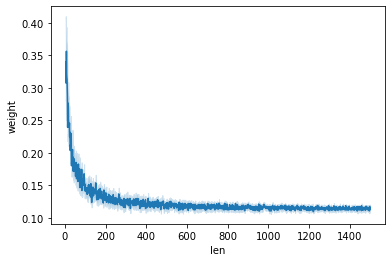

In [12]:

dt = pd.DataFrame(data)
sb.lineplot(data = dt, x="len", y="weight")